# List of Germal law journals aggregated from internet lists 


## Karlsruher Juristische Bibliographie

This is a list of journals curated by the publisher Beck as part of the "Karlsruh legal bibliography", see https://rsw.beck.de/zeitschriften/kjb, with 561 entries

- https://rsw.beck.de/zeitschriften/kjb/zs-abk%C3%BCrzungen---nach-k%C3%BCrzel
- archiviert unte https://web.archive.org/web/20241213135951/https://rsw.beck.de/zeitschriften/kjb/zs-abk%C3%BCrzungen---nach-k%C3%BCrzel

In [71]:
import requests
import pandas as pd
from io import StringIO
import re

r = requests.get('https://rsw.beck.de/zeitschriften/kjb/zs-abk%C3%BCrzungen---nach-k%C3%BCrzel')
df = pd.read_html(StringIO(r.text))[0][[1,2]]
df.columns = ['abbreviation', 'title']
df.drop(index=df.index[:5], inplace=True)
df.to_csv('data/web_lists/karlsruher-juristische-bibliographie-2024-12-13.csv')
df

,abbreviation,title
5,AbfallR,AbfallR - Zeitschrift für das Recht der Abfall...
6,AcP,Archiv für die civilistische Praxis
7,AfkKR,Archiv für katholisches Kirchenrecht
8,AfP,Archiv für Presserecht
9,AfS,Archiv für Sozialgeschichte
...,...,...
557,ZWE,Zeitschrift für Wohnungseigentumsrecht
558,ZWeR,Zeitschrift für Wettbewerbsrecht
559,ZWH,Zeitschrift für Wirtschaftsstrafrecht und Haft...
560,ZZP,Zeitschrift für Zivilprozeß


## Jura Recherche

The internet page https://jura-recherche.de provides a research interface for law students. Its list has 252 entries.

- https://jura-recherche.de/journals
- archived version: https://web.archive.org/web/20241213125553/https://jura-recherche.de/journals

In [45]:
import requests
import pandas as pd
from io import StringIO
import re

r = requests.get('https://jura-recherche.de/journals')
headers = ['index', 'abbreviation', 'title', 'homepage', 'feedback' ]
converters = {i: (lambda v: v[0]) for i in range(0, 5)}
converters[3] = lambda v: v[1]
df = pd.read_html(StringIO(r.text), converters=converters, extract_links='body')[0][[1,2,3]]
df.columns = ['abbreviation', 'title', 'url']
df.to_csv('data/web_lists/jura-recherche.de-2024-12-13.csv')
df

,abbreviation,title,url
0,AcP,Archiv für civilistische Praxis,https://www.mohrsiebeck.com/zeitschrift/archiv...
1,AfP,Archiv für Presserecht,https://www.afp-medienrecht.de/
2,AG,Die Aktiengesellschaft,http://www.die-aktiengesellschaft.de/
3,AiB,Arbeitsrecht im Betrieb,https://www.bund-verlag.de/zeitschriften/arbei...
4,AL,Ad Legendum,https://www.adlegendum.de
...,...,...,...
248,ZVertriebsR,Zeitschrift für Vertriebsrecht,https://rsw.beck.de/zeitschriften/zvertriebsr
249,ZVglRWiss,Zeitschrift für vergleichende Rechtswissenschaft,https://online.ruw.de/suche/zvglrwiss/
250,ZWeR,Zeitschrift für Wettbewerbsrecht,https://www.zwer-online.de/
251,ZWH,Zeitschrift für Wirtschaftsstrafrecht und Haft...,http://www.zwh-online.de/


## OpenJur - Juristische Fachzeitschriften

openJur is a database for german jurisdiction and legislation operated by openJur gGmbH, a non-profit organization under german law. It provides a list of German law journals with 173 entries.

- https://openjur.de/s/fachzeitschriften.html
- archived at https://web.archive.org/web/20241213132902/https://openjur.de/s/fachzeitschriften.html

In [ ]:
%pip install  --quiet lxml html5lib bs4

In [48]:
import requests
from bs4 import BeautifulSoup
import re

url = 'https://openjur.de/s/fachzeitschriften.html'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
response = requests.get(url, headers=headers,  allow_redirects=True)
soup = BeautifulSoup(response.text, 'html.parser')
dl = soup.find('dl', class_='row')

journals = []
# Iterate through each <dt> and <dd> item in the <dl>
dt_elements = dl.find_all('dt')
dd_elements = dl.find_all('dd')

for dt, dd in zip(dt_elements, dd_elements):
    abbreviation = dt.text.strip()  # Extract abbreviation
    title = dd.text.strip()  # Extract title
    
    # Use regex to extract any potential information in parentheses
    acronym_match = re.search(r'\((.*?)\)', title)
    if acronym_match:
        abbreviation = acronym_match.group(1)  # Replace with the acronym if found

    # Store the journal information
    journals.append({
        'abbreviation': abbreviation,
        'title': title
    })


df = pd.DataFrame(journals)
df.to_csv('data/web_lists/openjur.de-2024-12-13.csv')
df

,abbreviation,title
0,AP,Arbeitsrechtliche Praxis
1,AG,Die Aktiengesellschaft
2,Archiv für Presserecht,Zeitschrift für das gesamte Medienrecht (Archi...
3,AnwBl,Anwaltsblatt
4,AöR,Archiv des öffentlichen Rechts
...,...,...
168,ZfBR,Zeitschrift für deutsches und internationales ...
169,ZaöRV,Zeitschrift für ausländisches öffentliches Rec...
170,ZVertriebsR,Zeitschrift für Vertriebsrecht
171,ZfPW,Zeitschrift für die gesamte Privatrechtswissen...


## Juris: Verzeichnis der ausgewerteten juristischen Periodika (Aufsätze) (2002)

This is the list of journals ingested by the commercial legal information platform "Juris" for their database on law journal articles. According to [this website](https://www.haufe.de/recht/deutsches-anwalt-office-premium/zeitschriften-fundstellenverzeichnis_idesk_PI17574_HI16388416.html) the list was available for download at [this link](https://www.juris.de/jportal/portal/page/fshelp.psml?cmsuri=/hilfe/de/r2/o_listen/listeaufsaetze.jsp) but it is no longer there and also not available via archive.org. We also couldn't find it on the juris website. The Bayrische Staatsbibliothek [has a PDF](https://www.bsb-muenchen.de/datenb/juris_zsliste.pdf), which we'll scrape below, using https://github.com/conjuncts/gmft (requires [PyTorch](https://pytorch.org/)). The list is from 2002 and has 383 entries.

In [11]:
!pip install "numpy<2" gmft -q 

^C


In [88]:
r = requests.get("https://www.bsb-muenchen.de/datenb/juris_zsliste.pdf")
with open("data/web_lists/juris-ingested-journals.pdf", "wb") as file:
    file.write(r.content)

Extract tables from PDF document

In [12]:
from gmft.pdf_bindings import PyPDFium2Document
from gmft.auto import CroppedTable, AutoTableDetector

detector = AutoTableDetector()

def ingest_pdf(pdf_path) -> list[CroppedTable]:
    doc = PyPDFium2Document(pdf_path)
    tables = []
    for idx, page in enumerate(doc):
        if idx < 34: continue
        tables += detector.extract(page)
    return tables, doc

tables, doc = ingest_pdf('data/web_lists/juris-ingested-journals-2002.pdf')

preprocessor_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

c:\Users\Boulanger\anaconda3\envs\kb-bibliometry\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Boulanger\.cache\huggingface\hub\models--microsoft--table-transformer-detection. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/76.5k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

Extract the journal list from the tables

In [18]:
from gmft.auto import AutoTableFormatter, RotatedCroppedTable
import pandas as pd
import json
formatter = AutoTableFormatter()
journals = []
for table in tables:
    if isinstance(table, RotatedCroppedTable):
        table.angle = 0
    ft = formatter.extract(table)
    df = ft.df()
    journals = journals + df.iloc[:, 0].tolist()
with open('data/web_lists/juris-ingested-journals-2002.json', 'w', encoding='utf-8') as f:
    json.dump(journals, f)
journals 

['Abfallrechtliche Praxis (AbfallPrax)',
 'Actes du...Congres International de Droit du Travail et de la Securite Sociale (Congres International)',
 'Agrarrecht (AgrarR)',
 'Agrarrecht (Beilage) (AgrarR)',
 'AK - Beiträge der Arbeitskammer des Saarlandes (AK-Beiträge)',
 'Arbeits- und Sozialrecht (ArbuSozR) (1981 eingestellt)',
 'Archiv des öffentlichen Rechts (AöR)',
 'Archiv des Völkerrechts (ArchVR)',
 'Archiv für das Post- und Fernmeldewesen (Archiv PF) (1991 eingestellt)',
 'Archiv für die civilistische Praxis (AcP)',
 'Archiv für katholisches Kirchenrecht (AfkKR)',
 'Archiv für Kriminologie (Archiv für Kriminologie)',
 'Archiv für Post und Telekommunikation (Archiv PT) (davor Zeitschrift für das Post\ufffeund Fernmeldewesen) (1999 eingestellt)',
 'Archiv für Presserecht (AfP)',
 'Archiv für Rechts- und Sozialphilosophie (ARSP)',
 'Archiv für Sozialgeschichte (Archiv für Sozialgeschichte)',
 'Archiv für Urheber-, Film-, Funk- und Theaterrecht (UFITA)',
 'Archiv für Wissenschaft un

Extract abbreviations and save to dataframe

In [21]:
import regex as re
import json
with open('data/web_lists/juris-ingested-journals-2002.json', encoding='utf-8') as f:
    journals = json.load(f)
journal_list = {'title':[], 'abbreviation':[]}
for journal in journals:
    if 'eingestellt' in journal or journal.startswith("("):
        continue
    if m := re.match(r'^(.+?) \(([^()]+)\)$', journal):
        title, abbr = m.group(1), m.group(2)
    elif m := re.match(r'^(\p{Lu}{2,}) (.+)$', journal):
        title, abbr = m.group(2), m.group(1)
    else:
        title, abbr = journal, ""

    journal_list['title'].append(title) 
    journal_list['abbreviation'].append(abbr)

df = pd.DataFrame(journal_list)
df.to_csv('data/web_lists/juris-ingested-journals-2002.csv', index=None)
df

,title,abbreviation
0,Abfallrechtliche Praxis,AbfallPrax
1,Actes du...Congres International de Droit du T...,Congres International
2,Agrarrecht,AgrarR
3,Agrarrecht (Beilage),AgrarR
4,AK - Beiträge der Arbeitskammer des Saarlandes,AK-Beiträge
...,...,...
370,Zeitschrift für Zölle und Verbrauchsteuern,ZfZ
371,"Zentralblatt für Arbeitsmedizin, Arbeitsschutz...",ZblArbeitsmed
372,Zentralblatt für Jugendrecht,ZfJ
373,"Zentralblatt für Sozialversicherung, Sozialhil...",ZfS


## Show intersections between lists

In [ ]:
%pip install  --quiet venny4py

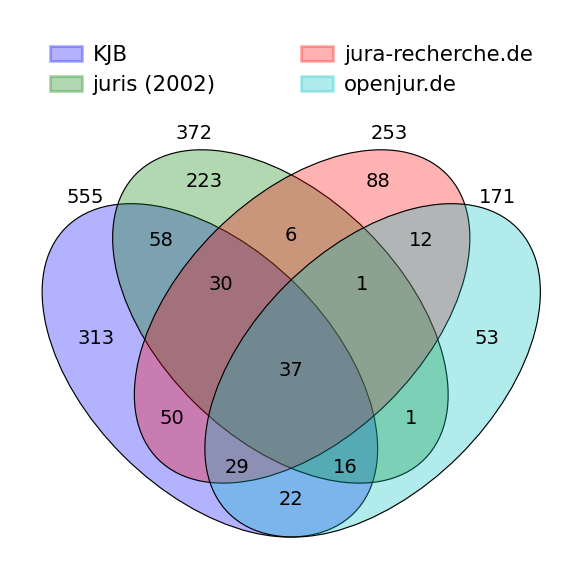

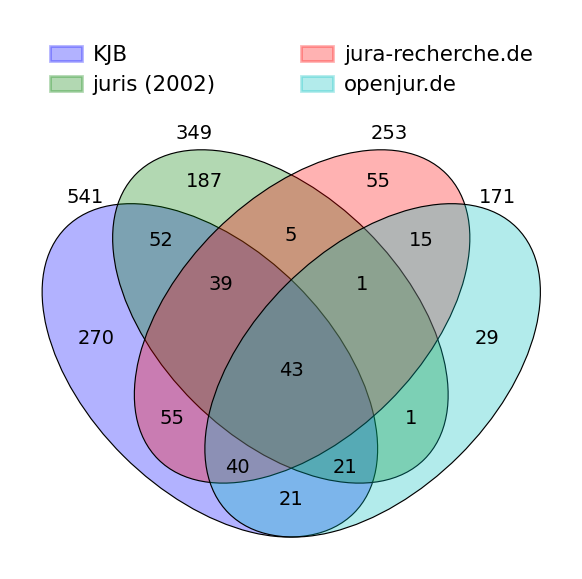

In [34]:
import pandas as pd 
from venny4py.venny4py import venny4py 

sets = {
    'KJB': 'data/web_lists/karlsruher-juristische-bibliographie-2024-12-13.csv',
    'juris (2002)': 'data/web_lists/juris-ingested-journals-2002.csv',
    'jura-recherche.de': 'data/web_lists/jura-recherche.de-2024-12-13.csv',
    'openjur.de': 'data/web_lists/openjur.de-2024-12-13.csv'
}
titles = {}
abbrevs = {}
for set_name, file_path in sets.items():
    df = pd.read_csv(file_path)
    titles[set_name] = set(df['title'].str.lower().unique())
    abbrevs[set_name] = set(df['abbreviation'].dropna().str.lower().unique())


venny4py(sets=titles, out="tmp")
venny4py(sets=abbrevs, out="tmp")

### Merge the above lists into a single one. 

Adapt the `file_paths` list below to include files which have columns "title" and "abbreviation".
The resulting list currently has 738 entries, but the matching is not good enough, so we won't use this list. 


In [35]:
import pandas as pd

df = pd.DataFrame(columns=['abbreviation','title'])
file_paths = [
    'data/web_lists/karlsruher-juristische-bibliographie-2024-12-13.csv',
    'data/web_lists/jura-recherche.de-2024-12-13.csv',
    'data/web_lists/openjur.de-2024-12-13.csv',
    'data/web_lists/juris-ingested-journals-2002.csv'
]

for file_path in file_paths:
    df_new = pd.read_csv(file_path)
    for _, new_row in df_new.iterrows():
        title = new_row['title']
        abbreviation = new_row['abbreviation']
        matching_rows = df[df['title'].str.lower() == title.lower()]

        if not matching_rows.empty:
            existing_index = matching_rows.index[0]

            # Get the existing abbreviation, ensuring it is a string
            existing_abbreviation = df.at[existing_index, 'abbreviation']
            if pd.isna(existing_abbreviation):
                existing_abbreviation = ""  # Handle NaN case
                
            # If abbreviation is new, append it correctly
            if abbreviation not in existing_abbreviation.split(', '):
                if existing_abbreviation:  # If there's already an abbreviation
                    df.at[existing_index, 'abbreviation'] += f", {abbreviation}"
                else:
                    df.at[existing_index, 'abbreviation'] = abbreviation
        else:
            # If the journal does not exist, add the new row
            df = pd.concat([df, pd.DataFrame([[abbreviation, title]], columns=['abbreviation', 'title'])], ignore_index=True)

df.to_csv("data/web_lists/rewi-journals-weblists-aggregated.csv", index=False)
df.sort_values(by='title', inplace=True)
df.reset_index(drop=True, inplace=True)
df

,abbreviation,title
0,AK-Beiträge,AK - Beiträge der Arbeitskammer des Saarlandes
1,ASDA-Bulletin,ASDA-Bulletin : Schweizer Fachzeitschrift für ...
2,AWR-Bulletin,AWR-Bulletin : Vierteljahresschrift für Flücht...
3,AbfallR,AbfallR - Zeitschrift für das Recht der Abfall...
4,AbfallPrax,Abfallrechtliche Praxis
...,...,...
934,ÖZW,Österreichische Zeitschrift für Wirtschaftsrecht
935,AnwBl,Österreichisches Anwaltsblatt
936,öarr,Österreichisches Archiv für Recht und Religion
937,RdW,Österreichisches Recht der Wirtschaft


## Comparison with previous list

In [36]:
# sets 
set_a = set(pd.read_csv('data/web_lists/juristische-zeitschriften.csv')['journal'].unique())
set_b = set(pd.read_csv('data/web_lists/rewi-journals-weblists-aggregated.csv')['title'].unique())

# Calculate differences
difference_a_b = set_a - set_b  # Elements in set_a but not in set_b
difference_b_a = set_b - set_a  # Elements in set_b but not in set_a
print("Difference (old - new):", len(difference_a_b))
print("Difference (new - old):", len(difference_b_a))

print("Journal that are in the old set but not in the new:")
print(" - " + "\n - ".join(difference_a_b))


Difference (old - new): 83
Difference (new - old): 273
Journal that are in the old set but not in the new:
 - Familienrecht Kompakt
 - Zeitschrift für internationale Strafrechtsdogmatik
 - Zeitschrift für das gesamte Schuldrecht [bzw.Zeitschrift für Vertragsgestaltung, Schuld- und Haftungsrecht]
 - Zeitschrift für europäisches Privatrecht
 - Zeitschrift für Japanisches Recht
 - Sozialrecht aktuell
 - Praxis der Rechtspsychologie
 - Vollstreckung effektiv
 - Zeitschrift für Sozialrecht in Deutschland und Europa
 - Recht in Afrika
 - Recht der Internationalen Wirtschaft
 - Gewerblicher Rechtsschutz und Urheberrecht, Praxis im Immaterial- und Wettbewerbsrecht
 - Kommunikation und Recht
 - Landes- und Kommunalverwaltung für die Länder Berlin, Brandenburg, Sachsen, Sachsen-Anhalt, Thüringen
 - Recht der Erneuerbaren Energien
 - EU-Umsatz-Steuer-Berater
 - Zeitschrift für Arbeitsrecht und Tarifpolitik in Kirche und Caritas
 - Zeitschrift für die Gesamte Strafrechtswissenschaft
 - Zeitschrift

## Check ISSN coverage at lobid.org

This has been used to match the previous list of journals with ISSN, not using it for the new list since we're relying on our gold standard. 

In [1]:
import pandas as pd
from tqdm.notebook import tqdm

# Load the datasets
df1 = pd.read_csv("data/web_lists/juristische-zeitschriften.csv", encoding="utf-8")
df2 = pd.read_csv("data/zdb/zdb-ger-law-issn.csv", encoding="utf-8")

# Add columns for ISSN and check
df1['issn'] = pd.NA
df1['check'] = pd.NA

# Function to format ISSN
def format_issn(issn):
    # Split the ISSN string by spaces and then format each ISSN
    issn_list = issn.split()
    formatted_issns = [issn if '-' in issn else (issn[:4] + '-' + issn[4:]) for issn in issn_list ]
    return ','.join(formatted_issns)

for idx in tqdm(df1.index):
    # Check if ISSN is missing
    if pd.isna(df1.loc[idx, 'issn']):
        journal = df1.loc[idx, 'journal']
        abbreviation = df1.loc[idx, 'abbreviation']

        # Match by journal
        matched_rows = df2[df2['title'] == journal]

        # If no match by journal, try alternativeTitle or otherTitleInformation
        if matched_rows.empty:
            matched_rows = df2[df2['alternativeTitle'].str.contains(journal, na=False, regex=False) | df2['otherTitleInformation'].str.contains(journal, na=False, regex=False) | df2['alternativeTitle'].str.contains(abbreviation, na=False, regex=False) | df2['otherTitleInformation'].str.contains(abbreviation, na=False, regex=False)]

            if not matched_rows.empty:
                # Take the first match's title for the check column to exclude false positives
                df1.at[idx, 'check'] = matched_rows.iloc[0]['title']

    # Update ISSN if there are matches
        if not matched_rows.empty:
            issns = []
            for issn in matched_rows['issn'].apply(format_issn):
                issns.extend(issn.split(','))
            df1.at[idx, 'issn'] = ','.join(set(issns))
            
# Save the updated dataframe with the added ISSNs from the lobid/ZDB data
df1.to_csv("data/web_lists/juristische-zeitschriften-issn.csv", index=False, encoding="utf-8")

  0%|          | 0/750 [00:00<?, ?it/s]

### Add  DOI coverage to list

This was only an experiment - not used.

In [ ]:
import pandas as pd
from lib.crossref import get_dois_years
from tqdm.notebook import tqdm
import json

df = pd.read_csv("data/juristische-zeitschriften-lobid-berichtigt.csv", encoding="utf-8")

def compute_doi_coverage(row):
    issn_data = row['issn']
    if pd.notna(issn_data):
        issns = issn_data.split(',')
        doi_coverages = {issn: get_dois_years(issn) for issn in issns}
        values = set(doi_coverages.values())
        if len(values) == 1:
            return list(values)[0]
        else:
            return json.dumps(doi_coverages)
    return None

# add doi-coverage column
tqdm.pandas(desc="Checking for DOIs")
df['doi-coverage'] = df.progress_apply(compute_doi_coverage, axis=1)

df.to_csv("data/juristische-zeitschriften-issn-doi.csv", index=False, encoding="utf-8")


## Juraforum.de

This is a table where the journal abbreviation is not in a separate column and parsing it out has lots or edge cases,
so we're not using it

- https://www.juraforum.de/fuer-anwaelte/informationen-fuer-anwaelte/zeitschriften
- archived at https://web.archive.org/web/20241213132230/https://www.juraforum.de/fuer-anwaelte/informationen-fuer-anwaelte/zeitschriften

In [ ]:
import requests
from bs4 import BeautifulSoup
import regex as re

url = 'https://www.juraforum.de/fuer-anwaelte/informationen-fuer-anwaelte/zeitschriften'
#headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
#response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')
ul = soup.find('ul', class_='pfeile-blau abstand10')

journals = []
for li in ul.find_all('li'):
    a_tag = li.find('a')
    if a_tag:
        title = a_tag.text.strip()
        url = a_tag['href']

        # Use regex to extract abbreviation from the title
        m = re.search(r'^(.*?)(?: \p{Pd}|[:.]) |\((.*?)\)$', title)
        abbreviation = m and (m.group(1) if m.group(1) else m.group(2).strip() if m.group(2) else None)
        if m and m.group(1):
            title = re.sub(r'^(.*?)(?: \p{Pd}|[:.]) ','', title)
        elif m and m.group(1):
            title = re.sub(r'\((.*?)\)$','', title)

        journals.append({
            'abbreviation': abbreviation,
            'title': title,
            'url': url
        })

df = pd.DataFrame(journals)
df.to_csv('data/web_lists/jura-forum.de-2024-12-13.csv')
df

,abbreviation,title,url
0,JuS,Juristische Schulung & JuSDirekt - Zeitschrift...,http://www.beck-shop.de/JuS-Juristische-Schulu...
1,JW,Neue Juristische Wochenschrift & NJWDirekt,http://www.beck-shop.de/NJW-Neue-Juristische-W...
2,DStR,Deutsches Steuerrecht,http://www.beck-shop.de/DStR-Deutsches-Steuerr...
3,RZ,Zeitschrift für Bilanzierung und Rechnungswesen,http://www.beck-shop.de/BRZ-Zeitschrift-Bilanz...
4,ZA,Neue Zeitschrift für Arbeitsrecht,http://www.beck-shop.de/NZA-Neue-Zeitschrift-A...
...,...,...,...
153,"Zeitschrift für Hochschulrecht, Hochschulmanag...",zfhr,http://www.springer.com/springerwiennewyork/la...
154,None,Baurechtliche Blätter,http://www.springer.com/springerwiennewyork/la...
155,None,Medizinrecht,http://www.springer.com/law/journal/350
156,None,Natur und Recht,http://www.springer.com/law/journal/10357
